# Práctica 2: Aprendizaje Automático

## Predicción de supervivencia del Titánic

Esta práctica se divide en dos partes:

1º: En la primera parte se entrenarán cuatro clasificadores, perceptrón, regresión logística, arboles de decisión y random forest para predecir la probabilidad de supervivencia que tenían los pasajeros a partir de ciertas características. Además de escoger los mejores parámetros para cada modelo.

2º: En la segunda parte analizaremos la importancia de cada característica para cada modelo de predicción.

## 1º Parte

Importamos todas las librerías que necesitaremos (es necesario tener instalado la librería seaborn para poder importarla).

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 


from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



Cargamos el dataset y miramos que datos tenemos 

In [2]:
df = pd.read_csv("dades.csv")
df.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Un resumen básico estadístico 

In [3]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Como podemos observar en el dataset, tenemos las siguientes características:


-Características numéricas: edad (contínua), tarifa (contínua), SibSp (discreta), Parch (discreta)
    
-Características categóricas: Survived, Sex, Embarked, Pclass
    
-Características alfanuméricas: Ticket, cabin

Los tipos de datos para cada característica son:

* Passenger ID: int
* Survived: int
* Pclase: int
* Name: String
* Sex: String
* Age: float
* SibSp: int
* Parch: int
* Ticket: String
* Fare: float
* Cabin: String
* Embarked: String




Como se puede observar hay datos Nans, es decir que faltan datos para ciertas características, veamos cuántos faltan exactamente mediante la siguiente función, missingdata().

In [4]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje'])
    ms= ms[ms["Porcentaje"] > 0]
    return ms

In [5]:
missingdata(df)

,Total,Porcentaje
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


Como podemos observar hay un total de 866 datos que no se encuentran, siendo la característica Cabin la que más datos le faltan con 687, para arreglar esto o bien podemos eliminar la columna entera o bien podemos convertir esta característica en una  binaria donde indicaremos con 1 si los pasajeros tenían Cabina o 0 si no tenían cabina ya que se sabe que en el Titanic no todo el mundo tenía cabina. Para la característica de la edad rellenaremos los datos que faltan con la mediana, ya que es adecuada para este caso, para los dos 2 datos que faltan de embarked los rellenaremos con el valor de moda, es decir el valor de embarked que más se repita.



Como hemos visto antes hay 12 características de las cuales 5 son de tipo String, para poder trabajar con ellas tendremos que convertirlas a datos numéricos en los casos que se puedan.

* Name: String --> no se puede
* Sex: String --> 0 (male) o 1 (female) 
* Ticket: String --> no se puede
* Cabin: String --> 1 (tiene) 0 (no tiene)
* Embarked: String --> "S": 1, "C": 2, "Q": 3


#### Algunas suposiciones

* Las mujeres y los niños tienen más probabilidad de sobrevivir por el protocolo de mujeres y niños/niñas primero, por lo tanto miraremos las categorías de Sex y de Age.
    
* La clase social puede influir el tener o no tener recursos, por lo tanto se mirará que tipo de ticket tenían (Primera clase, Segunda clase, Tercera clase), por lo que se mirara la categoría de PClass
    

## Visualizar datos
Miraremos si las suposiciones están en lo correcto

#### Categoría Sex

Miramos dentro de los supervivientes cuántos son hombres y cuanto mujeres

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

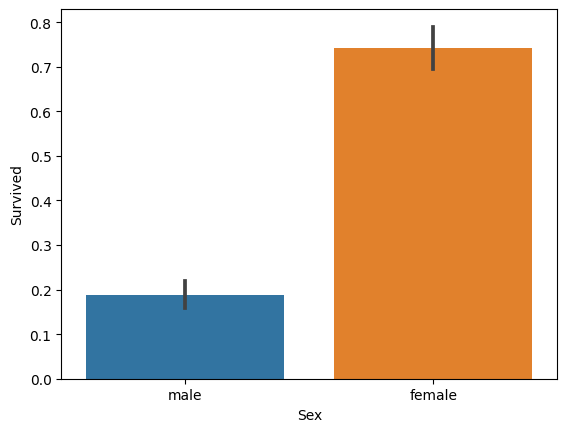

In [6]:
sb.barplot(x="Sex", y="Survived", data=df)

La gran mayoría de mujeres sobrevivieron mientras que solo un 20% de los hombres sobrevivieron

#### Categoría Pclass
Ahora con el tipo de clase (Primera, Segunda, Tercera)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

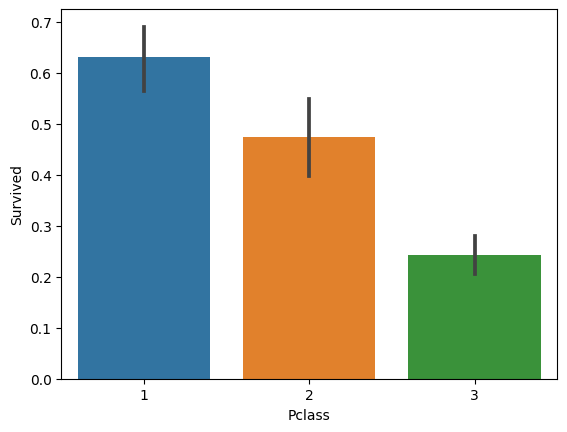

In [7]:
sb.barplot(x="Pclass", y="Survived", data=df)

Como se puede observar más de la mitad de los que eran de primera clase sobrevivieron, mientras que los que iban en tercera pereció mas del 70%, eso nos da a entender que el dato cabina puede ser útil, ya que los que solían tener cabina eran los de primera clase, así como el precio que pagaron por el ticket

#### Categoría  Age
Miramos la edad y la clasificaremos por rangos de edad, hay que recordar que hay parte de los pasajeros que no tienen edad ya que es desconocida.

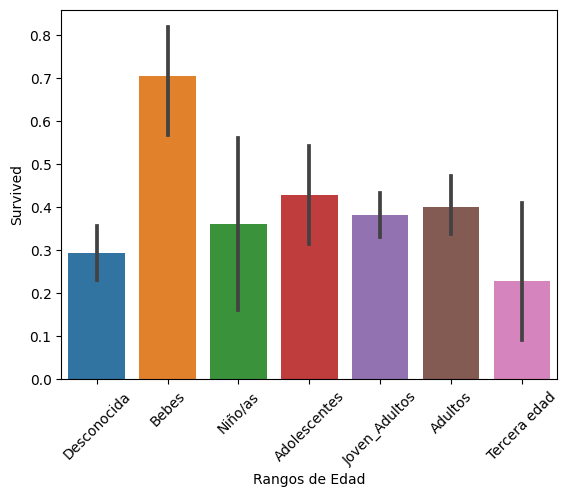

In [8]:
tmp_df = df.copy()
tmp_df["Age"] = tmp_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 35, 60, np.inf]
labels = ['Desconocida', 'Bebes', 'Niño/as', 'Adolescentes', 'Joven_Adultos', 'Adultos', 'Tercera edad']
tmp_df['Rangos de Edad'] = pd.cut(tmp_df["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sb.barplot(x="Rangos de Edad", y="Survived", data=tmp_df)
plt.xticks(rotation="45")
plt.show()

Se puede apreciar que los bebes tenían una tasa más alta de supervivencia junto con los adolescentes, curiosamente no con los niños de entre 5 y 12 años, eso podría ser debido a que la mayoría son de clase social inferior.

#### Porcentaje de niños y niñas supervivientes según la clase

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

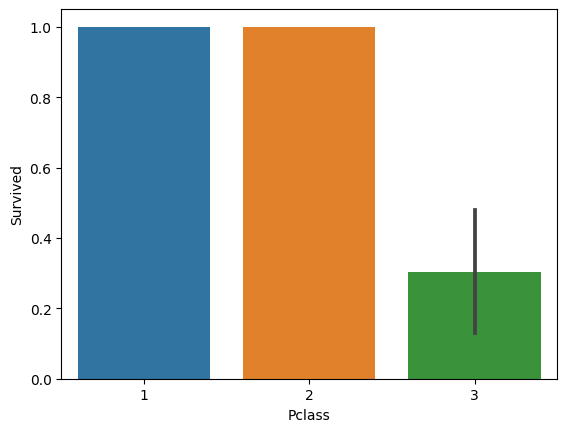

In [9]:
df_temp_children = df[(df["Age"] >= 5) & (df["Age"] <= 12)]
sb.barplot(x="Pclass",y="Survived", data=df_temp_children)

#### Cantidad total de niños y niñas de cada clase

<AxesSubplot:xlabel='Pclass', ylabel='count'>

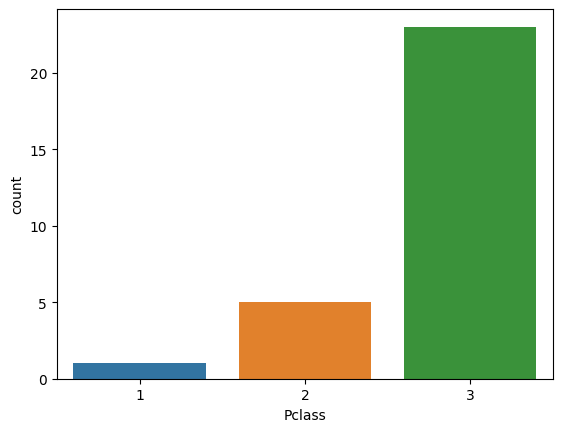

In [10]:
sb.countplot(x="Pclass", data=df_temp_children)

Como se puede ver hay más niños y niñas de la clase 3, que de las otras y al estar en una clase menos privilegiada parace ser que se aumenta el riesgo de morir, al menos entre la franja de edad de entre 5 a 12 años.

## Ajuste de los datos

Como podemos observar y hemos mencionado antes los datos están en bruto, ademas hay información  irrelevante, es decir hay características que no aportan nada de información como PassagerId, Name, Ticket, por tanto se pueden eliminar, también hay presencia de valores NaN, es decir que faltan datos. Además de esto, hay datos categóricos, que tendremos que convertir en numéricos.

Como hemos mencionado antes la característica Cabin o se puede eliminar o bien se puede convertir en binaria, vamos a convertirla en binaria donde 1 indicará si el pasajero tiene cabina y 0 si no tiene, más adelante veremos si hacer esto o eliminar la columna entera da mejor resultado a la hora de hacer las predicciones mediantes los clasificadores.

In [11]:

def fix_Cabin(cabin:str):
    if cabin != cabin:
        return 0
    else:
        return 1

df['Cabin'] = [fix_Cabin(cabin) for cabin in df['Cabin']]

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


Ahora para las características Age y Embarked, rellenaremos los datos que faltan realizando la mediana de los que tenemos y rellenando mediante el valor de moda, respectivamente.

In [13]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

Veamos si hemos eliminado todos los NaNs en el dataset

In [14]:
print('NaNs en el DataSet')
print(df.isnull().sum())

NaNs en el DataSet
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Ahora que hemos eliminado los valores NaNs, podemos eliminar el "ruido", por ejemplo las características del id del Pasajero, el nombre de este y el número de Ticket no aportan nada de información a la hora de predecir la supervivéncia del pasajero. Por tanto las eliminaremos.

In [15]:
df.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


Ahora toca arregla los datos categóricos, ya que con estos no podemos predecir con los clasificadores.

En primer lugar, convertiremos la característica categórica del género y de embarked, en un valor númerico mediante mappings.

In [16]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)
df['Embarked'] = df['Embarked'].map(embarked_mapping)
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,1,1
4,0,3,0,35.0,0,0,8.0500,0,1
5,0,3,0,28.0,0,0,8.4583,0,3
6,0,1,0,54.0,0,0,51.8625,1,1
7,0,3,0,2.0,3,1,21.0750,0,1
8,1,3,1,27.0,0,2,11.1333,0,1
9,1,2,1,14.0,1,0,30.0708,0,2


Así pues tenemos los datos arreglados y limpios.

## Normalización de datos

Ahora que tenemos los datos arreglados tenemos que normalizarlos, esto es de vital importancia ya que más adelante tendremos que realizar el feature importance y si no están normalizados las características con valores más altos tendrán la importancia más alta, cosa que no sería correcta.

In [17]:
# Utilizamos el standard scaler para normalizar los datos
scaler = StandardScaler()
df.Age=scaler.fit_transform(df.Age.values.reshape(-1,1))
df.Fare=scaler.fit_transform(df.Fare.values.reshape(-1,1))
df.SibSp=scaler.fit_transform(df.SibSp.values.reshape(-1,1))
df.Embarked=scaler.fit_transform(df.Embarked.values.reshape(-1,1))
df.Pclass=scaler.fit_transform(df.Pclass.values.reshape(-1,1))
df.Parch=scaler.fit_transform(df.Parch.values.reshape(-1,1))
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,0,-0.565736,0.432793,-0.473674,-0.502445,0,-0.568837
1,1,-1.566107,1,0.663861,0.432793,-0.473674,0.786845,1,1.005181
2,1,0.827377,1,-0.258337,-0.474545,-0.473674,-0.488854,0,-0.568837
3,1,-1.566107,1,0.433312,0.432793,-0.473674,0.420730,1,-0.568837
4,0,0.827377,0,0.433312,-0.474545,-0.473674,-0.486337,0,-0.568837
5,0,0.827377,0,-0.104637,-0.474545,-0.473674,-0.478116,0,2.579199
6,0,-1.566107,0,1.893459,-0.474545,-0.473674,0.395814,1,-0.568837
7,0,0.827377,0,-2.102733,2.247470,0.767630,-0.224083,0,-0.568837
8,1,0.827377,1,-0.181487,-0.474545,2.008933,-0.424256,0,-0.568837
9,1,-0.369365,1,-1.180535,0.432793,-0.473674,-0.042956,0,1.005181


# Entrenamiento

Ahora que ya tenemos el dataset listo podemos relizar el entrenamiento mediante los clasificadores. En primer lugar obtenemos los datos de entrenamiento y los de test, los obtendremos de dos formas la primera con nuestro dataset actual y la segunda eliminando la columna Cabin.

In [18]:
data = df.drop("Survived", axis=1)
Targeted_feature = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(data,Targeted_feature,test_size=0.3,random_state=42)

In [19]:
data2 = df.drop("Survived", axis=1)
data20 = data2.drop("Cabin", axis=1)
Targeted_feature = df["Survived"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(data20,Targeted_feature,test_size=0.3,random_state=42)

Realizaremos una prueba con el clasificador de regresión logística.

In [20]:
modelo_lr = LogisticRegression(random_state=0, max_iter=350).fit(X_train, y_train) # Aumentamos las iteraciones 
prediction_lr = modelo_lr.predict(X_test)
print('--------------Report del modelo----------------------------')
print(classification_report(prediction_lr,y_test))

--------------Report del modelo----------------------------
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       164
           1       0.76      0.81      0.78       104

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.83      0.82      0.83       268



In [21]:
modelo_lr2 = LogisticRegression(random_state=0, max_iter=350).fit(X_train2, y_train2) # Aumentamos las iteraciones 
prediction_lr2 = modelo_lr2.predict(X_test2)
print('--------------Report del modelo----------------------------')
print(classification_report(prediction_lr2,y_test))

--------------Report del modelo----------------------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       167
           1       0.72      0.79      0.75       101

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



Como se puede apreciar hemos obtenido en general puntuaciones más alta en las medidas de evaluación (más adelante se explicarán) con el dataset actual que eliminando la columna Cabin por tanto nos quedamos con los datos de entrenamiento y de test, en los que la columna cabin es un característica numérica.

Ahora si empezamos a entrenar los clasificadores con los datos que tenemos, para cada uno de ellos se entrenarán con los mejores parámetros o los óptimos, estos los podemos obtener mediante la librería GridSearchCV.

## Regresión Logística

Para el modelo de regresión logística los parámetros más interesantes son las iteraciones y los optimizadors o solvers.

max_iter: especifica el número máximo de iteraciones que se deben realizar durante el proceso de entrenamiento del modelo. El proceso de entrenamiento se detiene cuando se alcanza el número máximo de iteraciones o cuando se alcanza una convergencia, lo que ocurra primero.

solver: especifica el algoritmo utilizado para entrenar el modelo. Hay varios solvers disponibles, cada uno con sus propias ventajas y desventajas:

* 'newton-cg': Este solver utiliza el método de Newton-Conjugate-Gradient para entrenar el modelo. Es eficiente para problemas de gran tamaño y funciona bien con una alta dimensionalidad de los datos. Sin embargo, puede ser sensible a la escala de los datos y no es adecuado para problemas con muchos atributos categóricos.

* 'lbfgs': Este solver utiliza el algoritmo de Limited-Memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS) para entrenar el modelo. Es similar al solver 'newton-cg' en términos de eficiencia y capacidad de manejar problemas de gran tamaño y alta dimensionalidad, pero a menudo es más estable.

* 'liblinear': Este solver utiliza el algoritmo de optimización de mínimos cuadrados duales para entrenar el modelo. Es adecuado para problemas de gran tamaño, pero es menos eficiente que los solvers 'newton-cg' y 'lbfgs' y puede tardar más en converger.

* 'sag': Este solver utiliza el algoritmo de Stochastic Average Gradient (SAG) para entrenar el modelo. Es muy eficiente y puede manejar problemas de gran tamaño y alta dimensionalidad, pero puede ser menos preciso

In [22]:

iteraciones = np.arange(100,800,50)
#Algoritmo usado en la optimización
solver = np.array(['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'])

grid = GridSearchCV(estimator = modelo_lr,param_grid = dict(max_iter = iteraciones, solver = solver),cv = 3,verbose=1)
grid.fit(X_train,y_train)
#Mejores parametros para usar
print(grid.best_params_)


Fitting 3 folds for each of 70 candidates, totalling 210 fits
{'max_iter': 100, 'solver': 'liblinear'}


Ahora que tenemos los mejores parámetros para el modelo de regresión logística, podemos entrenarlo y realizar la predicción.

In [23]:
modelo_lr_hiperparametros = LogisticRegression( max_iter=100,solver='liblinear').fit(X_train, y_train) # Aumentamos las iteraciones 
prediction_lr_hiperparametros = modelo_lr_hiperparametros.predict(X_test)
print(classification_report(prediction_lr_hiperparametros,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       164
           1       0.76      0.81      0.78       104

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.83      0.82      0.83       268



Veamos que significan los resultados que obtenemos con el classification report:

`precision`: Porcentaje de predicciones positivas correctas en relación con el total de predicciones positivas.
`recall`: Porcentaje de predicciones positivas correctas en relación con el total de positivos reales.
`F1 Score`: Media harmònica ponderada de precision y recall

El mínimo es 0 y el máximo es 1 entonces cuanto más cerca de 1 mejor es nuestro modelo.

Support solo nos indica cuanto valores pertenecían a cada clase (0 no sobrevivió, 1 si sobrevivió).


Así pues para el modelo de regresión logísitca tenemos valores bastantes buenos alrededor de 0,80 - 0,90, veamos los otros modelos como rinden en comparación.

## Perceptron

Entrenamiento de perceptron sin hiperparámetros.

In [24]:
modelo_percep = linear_model.Perceptron(tol=1e-3, random_state=42)
modelo_percep.fit(X_train, y_train);

pred = modelo_percep.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       157
           1       0.69      0.74      0.71       111

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.75      0.75       268



A continuación elegiremos los mejores parámetros para el perceptrón.

* max_iter: igual que regresión logística

* tol: especifica el nivel de tolerancia para la convergencia del modelo. Si la diferencia entre el rendimiento del modelo en dos iteraciones consecutivas es menor que el valor de tolerancia, el proceso de entrenamiento se detiene.

* alpha: especifica el término de regularización utilizado en el modelo. El término de regularización se utiliza para evitar el sobreajuste y promover la generalización del modelo. Un valor más alto de alpha implica una mayor regularización y, por lo tanto, un modelo menos complejo.

* penalty: especifica el tipo de regularización utilizada en el modelo. Hay dos opciones disponibles: 'l2', que implica una regularización L2, y 'l1', que implica una regularización L1. La regularización L2 promueve la suavidad de la función de predicción mientras que la regularización L1 promueve la simplicidad y la selección de atributos.

In [25]:
iter = list(range(1000, 1501, 100))
param_grid = {'penalty': ['l1', 'l2'], 'alpha': [0.001, 0.01, 0.1], 'max_iter':iter,'tol':[1e-3, 1e-4, 1e-5],'random_state':[0,10,42]}

grid_search = GridSearchCV(estimator=modelo_percep, param_grid=param_grid, cv=5)
grid_search.fit(X_train,y_train)
#Mejores parametros para usar
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l1', 'random_state': 0, 'tol': 0.001}
0.7448774193548388


Modelo perceptron con hiperparámetros

In [26]:
modelo_percep_hiperparametros = linear_model.Perceptron(tol=0.001, alpha=0.001, penalty='l1',max_iter=1000, random_state=0).fit(X_train, y_train) # Aumentamos las iteraciones 
prediction_percep_hiperparametros = modelo_percep_hiperparametros.predict(X_test)
print(classification_report(prediction_percep_hiperparametros,y_test))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       196
           1       0.52      0.81      0.63        72

    accuracy                           0.75       268
   macro avg       0.72      0.77      0.72       268
weighted avg       0.81      0.75      0.76       268



Como se puede apreciar el modelo de preceptron rinde bastante peor en general que el de regresión logística, especialemmte en la característica de precision con solo un 0,52, tiene sentido ya que el perceptron es el clasificador  más basico de todos.

## Decision Tree

Finalmente emplearemos el arbol de decisión y random forest.
Arbol de decisión sin hiperparámetros:

In [27]:
modelo_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
modelo_tree = modelo_tree.fit(X_train,y_train)

y_pred = modelo_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       157
           1       0.69      0.68      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



Modelo arbol de decision con hiperparámetros. Los parámetros elegidos son:

* criterion: es el criterio utilizado para medir la calidad de una división. Los valores posibles son "gini" para medir la impureza de Gini o "entropy" para medir la entropía. Por defecto, se utiliza "gini".

* max_depth: es la profundidad máxima del árbol. Esto significa que el árbol no crecerá más allá de esa profundidad. Esto se utiliza para evitar que el árbol se vuelva demasiado complejo y para controlar el sobreajuste. Si no se establece un valor, el árbol crecerá hasta que tenga una sola hoja por nodo.

* min_samples_split: es el número mínimo de muestras necesarias para dividir un nodo. Si un nodo tiene menos muestras de lo especificado, no se dividirá. Esto se utiliza para evitar que el árbol se vuelva demasiado complejo y para controlar el sobreajuste.

* splitter: es el método utilizado para seleccionar el atributo y el valor de corte en cada nodo del árbol. Los valores posibles son "best" para seleccionar el mejor atributo y el valor de corte según la función de costo especificada en el criterio, o "random" para seleccionar aleatoriamente un atributo y un valor de corte. Por defecto, se utiliza "best".

In [28]:
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'criterion':["gini", "entropy", "log_loss"], 'splitter' : ["best", "random"]}

# Create the grid search object
grid_search = GridSearchCV(estimator=modelo_tree, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'splitter': 'random'}
0.8266193548387097


In [29]:
modelo_tree_hiperparametros = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=8,splitter='random')

# Train Decision Tree Classifer
modelo_tree_hiperparametros = modelo_tree_hiperparametros.fit(X_train,y_train)

y_pred_hiperparametros = modelo_tree_hiperparametros.predict(X_test)

print(classification_report(y_test, y_pred_hiperparametros))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.67      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



Como se puede apreciar tenemos resultados bastante mejores que el perceptron y algo mejores en general que el modelo de regresión logística. Veamos ahora como se comporta el random forest.

## Random Forest

Modelo del Random Forest sin hiperparámetros.

In [30]:
modelo_Forest = RandomForestClassifier()

modelo_Forest = modelo_Forest.fit(X_train,y_train)

y_pred = modelo_Forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       157
           1       0.72      0.69      0.71       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



Modelo Random Forest con hiperparámetros.

En primer lugar cabe destacar que hay variabilidad en la salida, eso se debe a que cada vez se ejecuta el gridSearchCV se crean varios arboles distintos, lo que da a diferentes resultados en las votaciones de los arboles y diferentes best_params_ y best_scores_, se eligen los valores que mas se repitieron, con mejores resultados al ejecutar varias veces el gridSearchCV. Los parámetros elegidos son:

* criterion y max_depth: igual que en el arbol de decisión.

* n_estimators: es el número de árboles del bosque. Mayor número de árboles aumenta la capacidad de predicción del modelo, pero también aumenta el tiempo de entrenamiento y puede aumentar el sobreajuste. Por lo general, se recomienda elegir un número lo suficientemente alto para que el modelo tenga una buena capacidad de predicción, pero no tan alto que cause sobreajuste.

In [31]:
param_grid = {'n_estimators': [7,13, 17, 19], 'max_depth': [ 2, 4, 6, 8],'criterion':["gini", "entropy"]}

# Create the grid search object
grid_search = GridSearchCV(estimator=modelo_Forest, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 17}
0.8266598538337669


In [32]:
modelo_Forest_hiperparametros = RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=13)

modelo_Forest_hiperparametros = modelo_Forest_hiperparametros.fit(X_train,y_train)

y_pred_hiperparametros = modelo_Forest_hiperparametros.predict(X_test)

print(classification_report(y_test, y_pred_hiperparametros))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.81      0.65      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



Como se puede apreciar los resultados del random forest son parecidos o algo superiores al de decision tree, haciendo que este sea el que tenga mejores resultados que los otros modelos, tiene sentido ya los modelos de arboles en problemas del mundo real como es este se comportan mejor que los modelos lineales, debido a la complejidad de los datos.

## 2ºParte

En esta segunda parte como ya hemos mencionado al principio, aplicaremos la técnica de feature importance, para así obtener y analizar la importancia de cada característica para cada modelo entrenado.

La regresión logística y el preceptron al ser modelos lineales se reducen a una ecuación en la que se asignan coeficientes (importancias) a cada valor de entrada.

En pocas palabras, si un coeficiente asignado es un número grande (negativo o positivo), tiene cierta influencia en la predicción. Por el contrario, si el coeficiente es cero, no tiene ningún impacto en la predicción. Por otra parte para los arboles de decisión y el random forest se utilizara el atributo que tienen de feature_importance_. 

## Regresión Logísitca

In [33]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelo_lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

  Attribute  Importance
1       Sex    2.455659
6     Cabin    0.618018
7  Embarked    0.186440
5      Fare    0.118054
4     Parch   -0.063621
3     SibSp   -0.299806
2       Age   -0.439943
0    Pclass   -0.619870


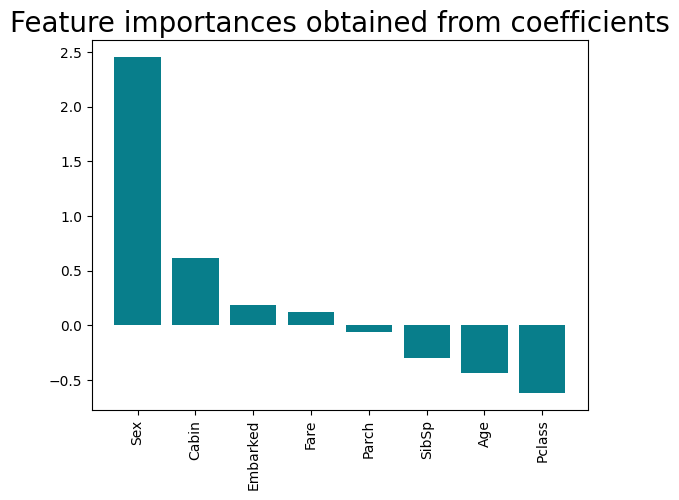

In [34]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Como se puede apreciar la caracteristica más importante para el modelo de regresión logística, es el sexo, esto no debe sorprendernos ya que en aquel entonces, en este tipo de situaciones se les daba prioridad a los niños y a las mujeres, de ahí la frase: "mujeres y niños primero". Seguidamente las caracteríticas de Cabin y Pclass tiene una importancia alta, podemos intuir que si tenian cabina y/o un ticket de mayor clase tenian más posibilidades de sobrevivir. Veamos los siguientes modelos para comparar.

## Perceptron

In [35]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelo_percep.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

  Attribute  Importance
1       Sex    7.000000
5      Fare    4.203054
6     Cabin    2.000000
2       Age   -0.558090
4     Parch   -2.596846
7  Embarked   -3.451887
3     SibSp   -3.978644
0    Pclass   -4.136886


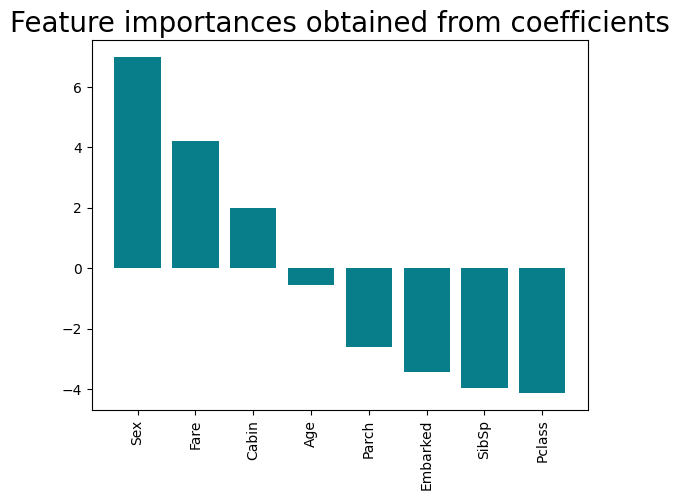

In [36]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Como podemos ver el género vuelve a ser la característica ganadora. Además de esto podemos ver que Fare y Pclass tienen bastante importancia, por tanto la hipótesis de que de tener más dinero o ser de una clase social más alta, aumentaba las probabilidades de sobrevivir parace ser cierta.

## Decision Tree

In [37]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelo_tree.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

  Attribute  Importance
1       Sex    0.297225
5      Fare    0.244959
2       Age    0.210933
0    Pclass    0.106949
3     SibSp    0.056776
7  Embarked    0.033019
6     Cabin    0.032351
4     Parch    0.017789


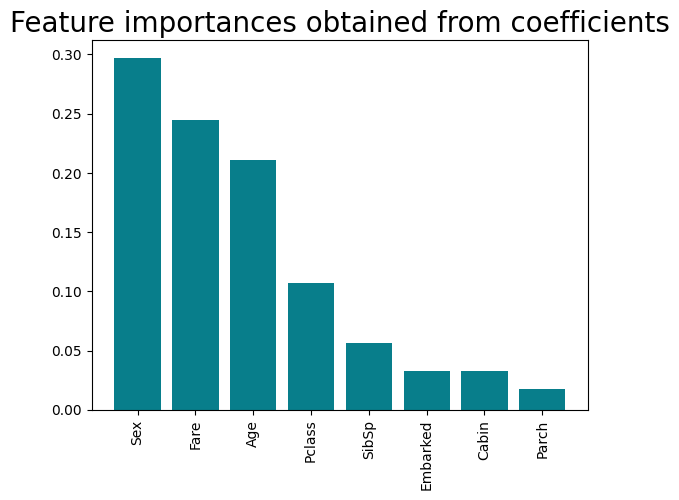

In [38]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Según el modelo del arbol de decisión otra vez el sexo, adquiere más importancia, además de esto siguen el Fare y la edad, por tanto, como hemos dicho antes, ser mujer y niño parecen ser las características más importantes a la hora de sobrevivir.

## Random Forest

In [39]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelo_Forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

  Attribute  Importance
5      Fare    0.260193
2       Age    0.245403
1       Sex    0.243040
0    Pclass    0.075167
3     SibSp    0.049468
6     Cabin    0.046128
7  Embarked    0.042627
4     Parch    0.037974


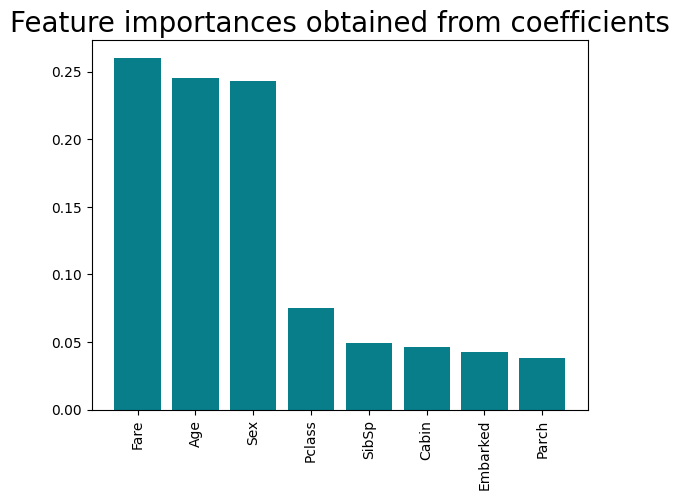

In [40]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Finalmente para el random forest las caracteristicas de Fare, Sex y Age, seguidas de PClass son las ganadoras, nuevamente cumpliendo nuestra hipotésis.

# Conclusiones

Como hemos podido apreciar en este trabajo, los clasificadores no lineales, como los modelos de arboles se comportan mejor, o rinden mejor en entornos con datos más complejos, o "del mundo real", estos funcionan dividiendo el conjunto de datos, en una estructura similar a un árbol, en subconjuntos cada vez más pequeños y luego hacen predicciones basadas en en qué subconjunto caería un nuevo ejemplo.

Por otra parte en cuanto al problema de supervivencia del Titanic, como hemos visto mediante las feature importances de cada modelo, las características más importantes en general a la hora de predecir si los pasajeros sobrevivieron o no han sido: el sexo, el Fare, Cabin, Age y PClass. Por tanto podemos deducir que se aplicaba el código de conducta "Mujeres y niños primero", a la hora de acceder a los botes salvavidas etcétera. Además se ve que si los pasajeros eran de primera clase, o tenían más dinero, tenían más ventajas a la hora de acceder a los botes, aumentando así las probabilidades de sobrevivir.